# WeatherPy
----

In this analysis, we utilized Python code in conjunction with open access API systems to curate weather and geographic coordinates of 500+ cities located around the globe. By cleaning and analyzing data gathered from OpenWeather API, some conclusions could be made on the basis of city weather in relation to the location of the equator:

1. There were distinctive differences in the relationship of maximum ambient temperature and latitude coordinates between the northern and southern hemispheres. The northern hemisphere had a defined negative relationship as latitude increased, with the correlation coefficient equaling -1.42, meaning that as the latitude increased and cities were located further away from the equator, the temperatures dropped substantially. This would make sense as this data was collected in February 2021 and the northern hemisphere is in it's winter solstice during that time. The opposite can be observed with the analysis of temperature and latitude in the southern hemisphere, which had a slightly positive relationship with a positive correlation coefficient of 0.28. As the latitude is further away from the equator maximum temperature is lower, however there is a weaker coefficient for the southern hemisphere in February 2021 as it is currently within it's summer solstice so on average the temperatures are higher.

2. For both hemispheres, there seems to be minimal influence or correlations between percent humidity and a city's latitude coordinates. With very low correlation coefficients (less than 0.5) displayed in the linear regression analysis, observing relationships based on temperatures would be more accurate as humidity is dependent on the temperature levels.

3. Given that wind speed is affected by changes in air pressure in relation to temperature differences in the atmosphere, it makes sense that the southern hemisphere would have a slightly negative assocation with wind speed and latitude. As cities are located closer to the equator the air temperature is naturally higher, so there is less cool air dropping as warm air rises. The further away a city is from the equator the ambient temperature is generally cooler, so as warm air rises there is a greater change in air flow as cool air descends and increases overall wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [3]:
#debugging only
# cities = cities[0:10]
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create query url to scan API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

In [5]:
#list for analysis parameters
city_name = []
city_lat = []
city_lng = []
city_country =[]
city_date =[]
city_temp = []
city_humidity = []
city_cloud_cover = []
city_wind_speed = []

In [6]:
print("Retrieving Desired City Data")
print(f"----------------------------------")
records = 0
records_set = 1

#for loop to go through each city from the API with try/except block so code doesn't break
for city in cities:
    city_url = f"{query_url}{city}"
    records = records + 1
    try:
        response = requests.get(city_url).json()
        time.sleep(0.5)
        print(f"Processing city number {records}")
        print(response)
        print()
        print()
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_cloud_cover.append(response["clouds"]["all"])
        city_wind_speed.append(response["wind"]["speed"])
        
        #Conditional for group city outputs 
        if records > 50:
            records_set += 1
            records = 1
    except:
        print(f"City not found")

print(f"----------------------------------")
print(f"End of Data Retrieval Process")
print(f"----------------------------------")

Retrieving Desired City Data
----------------------------------
Processing city number 1
{'coord': {'lon': 26.9167, 'lat': -6.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.07, 'feels_like': 76.01, 'temp_min': 70.07, 'temp_max': 70.07, 'pressure': 1010, 'humidity': 96, 'sea_level': 1010, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 2.01, 'deg': 165}, 'clouds': {'all': 84}, 'dt': 1613261074, 'sys': {'country': 'CD', 'sunrise': 1613276256, 'sunset': 1613320539}, 'timezone': 7200, 'id': 215668, 'name': 'Kabalo', 'cod': 200}


Processing city number 2
{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -6.14, 'feels_like': -19.95, 'temp_min': -6.14, 'temp_max': -6.14, 'pressure': 1029, 'humidity': 83, 'sea_level': 1029, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'spe

Processing city number 16
{'coord': {'lon': -117.136, 'lat': 58.5169}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -0.4, 'feels_like': -11.51, 'temp_min': -0.4, 'temp_max': -0.4, 'pressure': 1031, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 160}, 'clouds': {'all': 1}, 'dt': 1613261085, 'sys': {'type': 1, 'id': 867, 'country': 'CA', 'sunrise': 1613229944, 'sunset': 1613263198}, 'timezone': -25200, 'id': 5975004, 'name': 'High Level', 'cod': 200}


Processing city number 17
{'coord': {'lon': 27.7839, 'lat': 37.3164}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 36.68, 'temp_min': 41, 'temp_max': 41, 'pressure': 1017, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1613261086, 'sys': {'type': 1, 'id': 7016, 'country': 'TR', 'sunrise

Processing city number 31
{'coord': {'lon': 13.4055, 'lat': -12.5763}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.71, 'feels_like': 77.09, 'temp_min': 73.71, 'temp_max': 73.71, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.21, 'deg': 188}, 'clouds': {'all': 0}, 'dt': 1613261095, 'sys': {'country': 'AO', 'sunrise': 1613279124, 'sunset': 1613324156}, 'timezone': 3600, 'id': 3351663, 'name': 'Benguela', 'cod': 200}


Processing city number 32
{'coord': {'lon': 100.3543, 'lat': -0.9492}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 83.32, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1010, 'humidity': 94}, 'visibility': 9000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1613261096, 'sys': {'type': 1, 'id': 9423, 'country':

Processing city number 48
{'coord': {'lon': -75.978, 'lat': 36.8529}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.52, 'feels_like': 34.29, 'temp_min': 37, 'temp_max': 39.99, 'pressure': 1018, 'humidity': 99}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 43, 'gust': 3}, 'clouds': {'all': 100}, 'dt': 1613260854, 'sys': {'type': 3, 'id': 2032858, 'country': 'US', 'sunrise': 1613217267, 'sunset': 1613256120}, 'timezone': -18000, 'id': 4791259, 'name': 'Virginia Beach', 'cod': 200}


Processing city number 49
{'coord': {'lon': 84.2719, 'lat': 49.7386}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -1.28, 'feels_like': -7.94, 'temp_min': -1.28, 'temp_max': -1.28, 'pressure': 1038, 'humidity': 90, 'sea_level': 1038, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 0.38, 'deg': 195}, 'clouds': {'all': 40}, 'd

Processing city number 15
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 16
{'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -31.74, 'feels_like': -43.29, 'temp_min': -31.74, 'temp_max': -31.74, 'pressure': 1034, 'humidity': 83, 'sea_level': 1034, 'grnd_level': 1030}, 'visibility': 10000, 'wind': {'speed': 7.99, 'deg': 211}, 'clouds': {'all': 21}, 'dt': 1613261121, 'sys': {'country': 'RU', 'sunrise': 1613268635, 'sunset': 1613291880}, 'timezone': 25200, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}


Processing city number 17
{'coord': {'lon': 66.9961, 'lat': 30.5803}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.1, 'feels_like': 41.43, 'temp_min': 47.1, 'temp_max': 47.1, 'pressure': 1015, 'humidity': 45, 'sea_level': 1015, 'grnd_level': 844}, 'visibili

Processing city number 31
{'coord': {'lon': 43.2483, 'lat': 41.5739}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.64, 'feels_like': 26.89, 'temp_min': 31.64, 'temp_max': 31.64, 'pressure': 1025, 'humidity': 91, 'sea_level': 1025, 'grnd_level': 895}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 276}, 'clouds': {'all': 90}, 'dt': 1613261131, 'sys': {'country': 'GE', 'sunrise': 1613275433, 'sunset': 1613313523}, 'timezone': 14400, 'id': 615660, 'name': 'Aspindza', 'cod': 200}


Processing city number 32
{'coord': {'lon': -39.2481, 'lat': -17.7125}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.33, 'feels_like': 79.11, 'temp_min': 75.33, 'temp_max': 75.33, 'pressure': 1014, 'humidity': 81, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 6.02, 'deg': 56}, 'clouds': {'all': 51}, 'dt'

Processing city number 47
{'coord': {'lon': -171, 'lat': 65.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.09, 'feels_like': -12.44, 'temp_min': 1.09, 'temp_max': 1.09, 'pressure': 1019, 'humidity': 90, 'sea_level': 1019, 'grnd_level': 1018}, 'visibility': 7405, 'wind': {'speed': 12.77, 'deg': 344}, 'clouds': {'all': 100}, 'dt': 1613261142, 'sys': {'country': 'RU', 'sunrise': 1613330930, 'sunset': 1613360863}, 'timezone': 43200, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}


Processing city number 48
{'coord': {'lon': -73.65, 'lat': -37.6167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.22, 'feels_like': 47.59, 'temp_min': 57.22, 'temp_max': 57.22, 'pressure': 1015, 'humidity': 77, 'sea_level': 1015, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 17.29, 'deg': 181}, 'clouds': {'all': 1}, 'dt': 1613

Processing city number 14
{'coord': {'lon': 30.7861, 'lat': 59.7035}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 14.14, 'feels_like': 6.01, 'temp_min': 10.99, 'temp_max': 17.6, 'pressure': 1020, 'humidity': 93}, 'visibility': 9000, 'wind': {'speed': 4.47, 'deg': 320}, 'snow': {'1h': 0.56}, 'clouds': {'all': 75}, 'dt': 1613261154, 'sys': {'type': 1, 'id': 8926, 'country': 'RU', 'sunrise': 1613281006, 'sunset': 1613313932}, 'timezone': 10800, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}


Processing city number 15
{'coord': {'lon': 90.2201, 'lat': 25.5198}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.36, 'feels_like': 57.69, 'temp_min': 61.36, 'temp_max': 61.36, 'pressure': 1013, 'humidity': 43, 'sea_level': 1013, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 72}, 'clouds': {'all': 7}, 'dt': 1613261155, 's

Processing city number 32
{'coord': {'lon': 72.9667, 'lat': 3.7833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.74, 'feels_like': 83.43, 'temp_min': 80.74, 'temp_max': 80.74, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.43, 'deg': 56}, 'clouds': {'all': 16}, 'dt': 1613261167, 'sys': {'country': 'MV', 'sunrise': 1613265751, 'sunset': 1613308941}, 'timezone': 18000, 'id': 1337605, 'name': 'Mahibadhoo', 'cod': 200}


Processing city number 33
{'coord': {'lon': 167.55, 'lat': -13.8833}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 79.86, 'feels_like': 80.65, 'temp_min': 79.86, 'temp_max': 79.86, 'pressure': 1007, 'humidity': 87, 'sea_level': 1007, 'grnd_level': 995}, 'visibility': 5022, 'wind': {'speed': 17.65, 'deg': 334}, 'rain': {'1h': 5.615}, 'clo

Processing city number 48
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 49
{'coord': {'lon': 57.7575, 'lat': -20.3428}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.11, 'feels_like': 82.53, 'temp_min': 75, 'temp_max': 75.2, 'pressure': 1013, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 130}, 'rain': {'1h': 0.46}, 'clouds': {'all': 40}, 'dt': 1613261179, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1613267998, 'sunset': 1613313994}, 'timezone': 14400, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}


Processing city number 50
{'coord': {'lon': 18.4232, 'lat': -33.9258}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.69, 'feels_like': 68.85, 'temp_min': 66, 'temp_max': 69.01, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'s

Processing city number 15
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 16
{'coord': {'lon': -23.7142, 'lat': 64.8945}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.51, 'feels_like': 22.05, 'temp_min': 39.51, 'temp_max': 39.51, 'pressure': 998, 'humidity': 72, 'sea_level': 998, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 24.47, 'deg': 90}, 'clouds': {'all': 100}, 'dt': 1613261190, 'sys': {'country': 'IS', 'sunrise': 1613295440, 'sunset': 1613325657}, 'timezone': 0, 'id': 3414079, 'name': 'Olafsvik', 'cod': 200}


Processing city number 17
{'coord': {'lon': 121.9702, 'lat': 20.4487}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 73.02, 'feels_like': 72.39, 'temp_min': 73.02, 'temp_max': 73.02, 'pressure': 1014, 'humidity': 75, 'sea_level': 1014, 'grnd_level': 1011}, 'vis

Processing city number 32
{'coord': {'lon': 95.3222, 'lat': 5.5577}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.84, 'feels_like': 84.54, 'temp_min': 78.84, 'temp_max': 78.84, 'pressure': 1011, 'humidity': 78, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.68, 'deg': 134}, 'clouds': {'all': 38}, 'dt': 1613261178, 'sys': {'country': 'ID', 'sunrise': 1613260485, 'sunset': 1613303476}, 'timezone': 25200, 'id': 1215502, 'name': 'Banda Aceh', 'cod': 200}


Processing city number 33
{'coord': {'lon': 114.1577, 'lat': 22.2855}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 62.8, 'feels_like': 62.08, 'temp_min': 59, 'temp_max': 64.99, 'pressure': 1017, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.35, 'deg': 93}, 'clouds': {'all': 14}, 'dt': 1613261040, 'sys': {'type': 3, 'id': 2035

Processing city number 48
{'coord': {'lon': -22.4338, 'lat': 63.8424}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 20.5, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 997, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 90}, 'clouds': {'all': 90}, 'dt': 1613261213, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1613294808, 'sunset': 1613325675}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}


Processing city number 49
{'coord': {'lon': 156.8419, 'lat': -8.103}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.74, 'feels_like': 89.51, 'temp_min': 84.74, 'temp_max': 84.74, 'pressure': 1008, 'humidity': 72, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 9.6, 'deg': 310}, 'clouds': {'all': 48}, 'dt': 1613261214, 'sys': {

Processing city number 15
{'coord': {'lon': 113.1536, 'lat': 40.4394}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.1, 'feels_like': 17.2, 'temp_min': 27.1, 'temp_max': 27.1, 'pressure': 1019, 'humidity': 83, 'sea_level': 1019, 'grnd_level': 879}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 16}, 'clouds': {'all': 3}, 'dt': 1613261225, 'sys': {'country': 'CN', 'sunrise': 1613258563, 'sunset': 1613296839}, 'timezone': 28800, 'id': 2037391, 'name': 'Fengzhen', 'cod': 200}


Processing city number 16
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 17
{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.73, 'feels_like': 78.8, 'temp_min': 76.73, 'temp_max': 76.73, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1002}, 'visibil

Processing city number 34
{'coord': {'lon': -9.8833, 'lat': 10.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.31, 'feels_like': 72.81, 'temp_min': 77.31, 'temp_max': 77.31, 'pressure': 1008, 'humidity': 18, 'sea_level': 1008, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 95}, 'clouds': {'all': 0}, 'dt': 1613261239, 'sys': {'country': 'GN', 'sunrise': 1613286015, 'sunset': 1613328443}, 'timezone': 0, 'id': 2418437, 'name': 'Kouroussa', 'cod': 200}


Processing city number 35
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 36
{'coord': {'lon': -114.0611, 'lat': 27.9769}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.26, 'feels_like': 47.8, 'temp_min': 60.26, 'temp_max': 60.26, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility

Processing city number 51
{'coord': {'lon': 10.2704, 'lat': 13.9835}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.99, 'feels_like': 66.24, 'temp_min': 75.99, 'temp_max': 75.99, 'pressure': 1010, 'humidity': 17}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 359, 'gust': 17}, 'clouds': {'all': 0}, 'dt': 1613261253, 'sys': {'type': 3, 'id': 2021605, 'country': 'NE', 'sunrise': 1613281370, 'sunset': 1613323415}, 'timezone': 3600, 'id': 2444219, 'name': 'Gouré', 'cod': 200}


Processing city number 2
{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.29, 'feels_like': 67.57, 'temp_min': 69.8, 'temp_max': 73, 'pressure': 1013, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 210}, 'clouds': {'all': 1}, 'dt': 1613261031, 'sys': {'type': 1, 'id': 7151, 'country': 'MX',

Processing city number 19
{'coord': {'lon': -17.0347, 'lat': 20.931}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 53.83, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1016, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 20.71, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1613261266, 'sys': {'type': 1, 'id': 2444, 'country': 'MR', 'sunrise': 1613288335, 'sunset': 1613329556}, 'timezone': 0, 'id': 2377457, 'name': 'Nouadhibou', 'cod': 200}


Processing city number 20
{'coord': {'lon': -151.75, 'lat': -16.5167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.82, 'feels_like': 86.79, 'temp_min': 81.82, 'temp_max': 81.82, 'pressure': 1011, 'humidity': 68, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.92, 'deg': 11}, 'clouds': {'all': 2}, 'dt': 1613261213, 'sys': {'country': '

Processing city number 35
{'coord': {'lon': 31.7909, 'lat': 3.3779}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.33, 'feels_like': 73.27, 'temp_min': 73.33, 'temp_max': 73.33, 'pressure': 1008, 'humidity': 49, 'sea_level': 1008, 'grnd_level': 918}, 'visibility': 10000, 'wind': {'speed': 1.74, 'deg': 166}, 'clouds': {'all': 98}, 'dt': 1613261277, 'sys': {'country': 'UG', 'sunrise': 1613275610, 'sunset': 1613318846}, 'timezone': 10800, 'id': 235489, 'name': 'Adjumani', 'cod': 200}


Processing city number 36
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 37
{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 32.79, 'feels_like': 11.89, 'temp_min': 32.79, 'temp_max': 32.79, 'pressure': 1000, 'humidity': 93, 'sea_level': 1000, 'grnd_level': 995}, 'visi

Processing city number 51
{'coord': {'lon': -105.2667, 'lat': 21.5167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 63.82, 'temp_min': 68, 'temp_max': 68, 'pressure': 1014, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1613261288, 'sys': {'type': 1, 'id': 7127, 'country': 'MX', 'sunrise': 1613223174, 'sunset': 1613264271}, 'timezone': -25200, 'id': 3987544, 'name': 'San Blas', 'cod': 200}


Processing city number 2
{'coord': {'lon': 53.6902, 'lat': 61.6864}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.63, 'feels_like': -15.21, 'temp_min': -2.63, 'temp_max': -2.63, 'pressure': 1017, 'humidity': 88, 'sea_level': 1017, 'grnd_level': 1001}, 'visibility': 8851, 'wind': {'speed': 10.8, 'deg': 55}, 'clouds': {'all': 100}, 'dt': 1613261289, 'sys': {'co

Processing city number 17
{'coord': {'lon': 104.0833, 'lat': 49.0333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -8.95, 'feels_like': -17.03, 'temp_min': -8.95, 'temp_max': -8.95, 'pressure': 1037, 'humidity': 83, 'sea_level': 1037, 'grnd_level': 871}, 'visibility': 10000, 'wind': {'speed': 2.44, 'deg': 266}, 'clouds': {'all': 71}, 'dt': 1613261299, 'sys': {'country': 'MN', 'sunrise': 1613261670, 'sunset': 1613298086}, 'timezone': 28800, 'id': 2031405, 'name': 'Erdenet', 'cod': 200}


Processing city number 18
{'coord': {'lon': 10.5687, 'lat': 36.8167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 48.02, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1023, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1613261300, 'sys': {'type': 1, 'id': 1

Processing city number 34
{'coord': {'lon': -0.9345, 'lat': 45.3192}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 33.37, 'feels_like': 27.14, 'temp_min': 30.2, 'temp_max': 37.4, 'pressure': 1029, 'humidity': 93}, 'visibility': 5000, 'wind': {'speed': 4.61, 'deg': 80}, 'clouds': {'all': 13}, 'dt': 1613261312, 'sys': {'type': 1, 'id': 6450, 'country': 'FR', 'sunrise': 1613286410, 'sunset': 1613323754}, 'timezone': 3600, 'id': 3000071, 'name': 'Uch', 'cod': 200}


Processing city number 35
{'coord': {'lon': 3.1631, 'lat': 41.9174}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.97, 'feels_like': 46.35, 'temp_min': 48, 'temp_max': 51.01, 'pressure': 1028, 'humidity': 93}, 'visibility': 9000, 'wind': {'speed': 3.44, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1613261312, 'sys': {'type': 1, 'id': 6406, 'country': 'ES', 'sunrise': 16132850

Processing city number 49
{'coord': {'lon': 16.302, 'lat': 38.2779}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.39, 'feels_like': 35.46, 'temp_min': 37, 'temp_max': 52, 'pressure': 1017, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 340, 'gust': 27.63}, 'clouds': {'all': 75}, 'dt': 1613261324, 'sys': {'type': 1, 'id': 6710, 'country': 'IT', 'sunrise': 1613281592, 'sunset': 1613320298}, 'timezone': 3600, 'id': 6540819, 'name': 'Siderno', 'cod': 200}


Processing city number 50
{'coord': {'lon': -40.12, 'lat': -2.8856}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 82.83, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1010, 'humidity': 82, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 13.98, 'deg': 71}, 'clouds': {'all': 61}, 'dt': 1613261324, 

Processing city number 16
{'coord': {'lon': 141.9667, 'lat': -38.2667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.09, 'feels_like': 55.89, 'temp_min': 61.09, 'temp_max': 61.09, 'pressure': 1021, 'humidity': 67, 'sea_level': 1021, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 9.42, 'deg': 158}, 'clouds': {'all': 100}, 'dt': 1613261336, 'sys': {'country': 'AU', 'sunrise': 1613246386, 'sunset': 1613295186}, 'timezone': 39600, 'id': 2171099, 'name': 'Codrington', 'cod': 200}


Processing city number 17
{'coord': {'lon': 12.1997, 'lat': 65.4625}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.4, 'feels_like': 25.38, 'temp_min': 33.01, 'temp_max': 33.8, 'pressure': 1032, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 290}, 'clouds': {'all': 90}, 'dt': 1613261336, 'sys': {'type': 1, 

Processing city number 31
{'coord': {'lon': 145.7785, 'lat': -7.9631}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.3, 'feels_like': 88.43, 'temp_min': 81.3, 'temp_max': 81.3, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.55, 'deg': 283}, 'clouds': {'all': 100}, 'dt': 1613261210, 'sys': {'country': 'PG', 'sunrise': 1613247617, 'sunset': 1613292125}, 'timezone': 36000, 'id': 2094144, 'name': 'Kerema', 'cod': 200}


Processing city number 32
{'coord': {'lon': 52.0675, 'lat': 52.5093}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.35, 'feels_like': 2.41, 'temp_min': 15.35, 'temp_max': 15.35, 'pressure': 1016, 'humidity': 92, 'sea_level': 1016, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 13.13, 'deg': 213}, 'clouds': {'all': 63}, 'dt': 

Processing city number 47
{'coord': {'lon': 31.1511, 'lat': 27.2696}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 46.47, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1018, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1613261357, 'sys': {'type': 1, 'id': 2510, 'country': 'EG', 'sunrise': 1613277187, 'sunset': 1613317576}, 'timezone': 7200, 'id': 362973, 'name': 'Abnūb', 'cod': 200}


Processing city number 48
{'coord': {'lon': -41.0511, 'lat': -21.6403}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.23, 'feels_like': 77.54, 'temp_min': 77.23, 'temp_max': 77.23, 'pressure': 1014, 'humidity': 84, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 14.88, 'deg': 46}, 'rain': {'1h': 0.38860000000000006}, 'clouds': {'all': 100},

Processing city number 13
{'coord': {'lon': 21.5442, 'lat': 40.2619}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 21.96, 'feels_like': 8.87, 'temp_min': 17.6, 'temp_max': 26.01, 'pressure': 1020, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 330}, 'snow': {'1h': 2.8}, 'clouds': {'all': 100}, 'dt': 1613261368, 'sys': {'type': 1, 'id': 6628, 'country': 'GR', 'sunrise': 1613280513, 'sunset': 1613318861}, 'timezone': 7200, 'id': 734315, 'name': 'Siátista', 'cod': 200}


Processing city number 14
{'coord': {'lon': 58.1442, 'lat': 48.8264}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.59, 'feels_like': 17.31, 'temp_min': 25.59, 'temp_max': 25.59, 'pressure': 1020, 'humidity': 98, 'sea_level': 1020, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 6.76, 'deg': 185}, 'clouds': {'all': 100}, 'dt': 161326

Processing city number 30
{'coord': {'lon': -78.5906, 'lat': 9.4428}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.66, 'feels_like': 82.29, 'temp_min': 78.66, 'temp_max': 78.66, 'pressure': 1009, 'humidity': 81, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 332}, 'clouds': {'all': 40}, 'dt': 1613261380, 'sys': {'country': 'PA', 'sunrise': 1613216050, 'sunset': 1613258591}, 'timezone': -18000, 'id': 3703946, 'name': 'Narganá', 'cod': 200}


Processing city number 31
{'coord': {'lon': -113.5841, 'lat': 37.1041}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 51.94, 'feels_like': 47.97, 'temp_min': 50, 'temp_max': 54, 'pressure': 1001, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1613261381, 'sys': {'type': 1, 'id': 5832, '

Processing city number 47
{'coord': {'lon': -92.7503, 'lat': 49.7833}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': -13, 'feels_like': -22.43, 'temp_min': -13, 'temp_max': -13, 'pressure': 1027, 'humidity': 77}, 'visibility': 9656, 'wind': {'speed': 4.61, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1613261151, 'sys': {'type': 1, 'id': 816, 'country': 'CA', 'sunrise': 1613222655, 'sunset': 1613258783}, 'timezone': -21600, 'id': 5942913, 'name': 'Dryden', 'cod': 200}


Processing city number 48
{'coord': {'lon': 110.3, 'lat': 54.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -16.67, 'feels_like': -24.75, 'temp_min': -16.67, 'temp_max': -16.67, 'pressure': 1037, 'humidity': 79, 'sea_level': 1037, 'grnd_level': 969}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 351}, 'clouds': {'all': 66}, 'dt': 1613261393, 'sys': {'country': 'RU'

Processing city number 13
{'coord': {'lon': 110.8261, 'lat': 23.2281}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 61.95, 'feels_like': 62.35, 'temp_min': 61.95, 'temp_max': 61.95, 'pressure': 1018, 'humidity': 72, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 0.87, 'deg': 331}, 'clouds': {'all': 0}, 'dt': 1613261406, 'sys': {'country': 'CN', 'sunrise': 1613257807, 'sunset': 1613298713}, 'timezone': 28800, 'id': 1805515, 'name': 'Jinji', 'cod': 200}


Processing city number 14
{'coord': {'lon': 27.2453, 'lat': 31.3525}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 47.41, 'temp_min': 50, 'temp_max': 50, 'pressure': 1019, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1613261406, 'sys': {'type': 1, 'id': 2517, 'country': 'EG', 's

Processing city number 29
{'coord': {'lon': 167.7167, 'lat': -45.4167}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 56.3, 'feels_like': 56.08, 'temp_min': 56.3, 'temp_max': 56.3, 'pressure': 1019, 'humidity': 84, 'sea_level': 1019, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 1.28, 'deg': 347}, 'rain': {'1h': 1.538}, 'clouds': {'all': 100}, 'dt': 1613261417, 'sys': {'country': 'NZ', 'sunrise': 1613239426, 'sunset': 1613289786}, 'timezone': 46800, 'id': 2181625, 'name': 'Te Anau', 'cod': 200}


Processing city number 30
{'coord': {'lon': -46.1056, 'lat': -15.9169}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.99, 'feels_like': 79.36, 'temp_min': 72.99, 'temp_max': 72.99, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 1.83, 'deg': 108}, 'cloud

Processing city number 44
{'coord': {'lon': 56.7635, 'lat': 58.0348}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 13.08, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 1004, 'humidity': 86}, 'visibility': 6000, 'wind': {'speed': 15.66, 'deg': 80}, 'snow': {'1h': 0.12}, 'clouds': {'all': 75}, 'dt': 1613261428, 'sys': {'type': 1, 'id': 8984, 'country': 'RU', 'sunrise': 1613274433, 'sunset': 1613308036}, 'timezone': 18000, 'id': 485230, 'name': 'Sylva', 'cod': 200}


Processing city number 45
{'coord': {'lon': -179.1667, 'lat': 66.3167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -10.82, 'feels_like': -27.13, 'temp_min': -10.82, 'temp_max': -10.82, 'pressure': 1025, 'humidity': 92, 'sea_level': 1025, 'grnd_level': 967}, 'visibility': 173, 'wind': {'speed': 17.05, 'deg': 16}, 'snow': {'1h': 0.38}, 'clouds': {'all

Processing city number 9
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 10
{'coord': {'lon': -101.4787, 'lat': 32.2504}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 19.4, 'feels_like': 7.57, 'temp_min': 19.4, 'temp_max': 19.4, 'pressure': 1019, 'humidity': 86}, 'visibility': 6437, 'wind': {'speed': 11.5, 'deg': 70}, 'clouds': {'all': 90}, 'dt': 1613261168, 'sys': {'type': 1, 'id': 3489, 'country': 'US', 'sunrise': 1613223010, 'sunset': 1613262617}, 'timezone': -21600, 'id': 5517061, 'name': 'Big Spring', 'cod': 200}


Processing city number 11
{'coord': {'lon': 116.8463, 'lat': -20.7377}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.01, 'feels_like': 84.42, 'temp_min': 81.01, 'temp_max': 81.01, 'pressure': 1009, 'humidity': 67, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': 

Processing city number 27
{'coord': {'lon': -6.589, 'lat': 62.2266}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 11.43, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 1012, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 40.29, 'deg': 120, 'gust': 51.79}, 'clouds': {'all': 90}, 'dt': 1613261451, 'sys': {'type': 1, 'id': 1596, 'country': 'FO', 'sunrise': 1613290564, 'sunset': 1613322314}, 'timezone': 0, 'id': 2618795, 'name': 'Klaksvík', 'cod': 200}


Processing city number 28
{'coord': {'lon': 80.55, 'lat': 22.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.91, 'feels_like': 53.49, 'temp_min': 58.91, 'temp_max': 58.91, 'pressure': 1013, 'humidity': 34, 'sea_level': 1013, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 2.91, 'deg': 47}, 'clouds': {'all': 0}, 'dt': 1613261452, 'sys':

Processing city number 42
{'coord': {'lon': 97.75, 'lat': 22.9333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 50.74, 'feels_like': 48.65, 'temp_min': 50.74, 'temp_max': 50.74, 'pressure': 1015, 'humidity': 79, 'sea_level': 1015, 'grnd_level': 918}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 57}, 'clouds': {'all': 0}, 'dt': 1613261462, 'sys': {'country': 'MM', 'sunrise': 1613260925, 'sunset': 1613301871}, 'timezone': 23400, 'id': 1314759, 'name': 'Lashio', 'cod': 200}


Processing city number 43
{'coord': {'lon': -77.0636, 'lat': 26.5412}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.85, 'feels_like': 76.23, 'temp_min': 75.85, 'temp_max': 75.85, 'pressure': 1016, 'humidity': 84, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 13.49, 'deg': 156}, 'clouds': {'all': 64}, 'dt': 161326146

Processing city number 7
{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.99, 'feels_like': 81.86, 'temp_min': 75.99, 'temp_max': 75.99, 'pressure': 1007, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 6.11, 'deg': 76}, 'clouds': {'all': 50}, 'dt': 1613261472, 'sys': {'type': 3, 'id': 2020865, 'country': 'BR', 'sunrise': 1613207086, 'sunset': 1613254838}, 'timezone': -10800, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}


Processing city number 8
{'coord': {'lon': -112.4686, 'lat': 54.1169}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -9.99, 'feels_like': -19.44, 'temp_min': -11.2, 'temp_max': -9.4, 'pressure': 1041, 'humidity': 64, 'sea_level': 1041, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 150}, 'clouds': {'all': 12}, 'dt': 1613261473

Processing city number 22
{'coord': {'lon': 152.15, 'lat': -32.7167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.35, 'feels_like': 63.68, 'temp_min': 68, 'temp_max': 73.99, 'pressure': 1015, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 19.57, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1613261483, 'sys': {'type': 1, 'id': 9605, 'country': 'AU', 'sunrise': 1613244434, 'sunset': 1613292250}, 'timezone': 39600, 'id': 2155562, 'name': 'Nelson Bay', 'cod': 200}


Processing city number 23
{'coord': {'lon': 114.3333, 'lat': -8.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.94, 'feels_like': 85.23, 'temp_min': 78.94, 'temp_max': 78.94, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.19, 'deg': 234}, 'clouds': {'all': 100}, 'dt': 16132614

Processing city number 37
{'coord': {'lon': -83.5666, 'lat': 46.2501}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 8.6, 'feels_like': 0.5, 'temp_min': 8.6, 'temp_max': 8.6, 'pressure': 1025, 'humidity': 78}, 'visibility': 4828, 'wind': {'speed': 3.44, 'deg': 60}, 'snow': {'1h': 0.17}, 'clouds': {'all': 90}, 'dt': 1613261493, 'sys': {'type': 1, 'id': 3858, 'country': 'CA', 'sunrise': 1613220016, 'sunset': 1613257013}, 'timezone': -18000, 'id': 6164831, 'name': 'Thessalon', 'cod': 200}


Processing city number 38
{'coord': {'lon': -96.4661, 'lat': 15.7432}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.2, 'feels_like': 73.38, 'temp_min': 82, 'temp_max': 82.4, 'pressure': 1009, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 23.02, 'deg': 250, 'gust': 34.52}, 'clouds': {'all': 20}, 'dt': 1613261494, 'sys': {'type': 1, 'id'

Processing city number 2
{'coord': {'lon': 150.1667, 'lat': 59.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -1.44, 'feels_like': -12.62, 'temp_min': -1.44, 'temp_max': -1.44, 'pressure': 1019, 'humidity': 81, 'sea_level': 1019, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 8.25, 'deg': 38}, 'clouds': {'all': 25}, 'dt': 1613261441, 'sys': {'country': 'RU', 'sunrise': 1613252406, 'sunset': 1613285230}, 'timezone': 39600, 'id': 2127060, 'name': "Arman'", 'cod': 200}


Processing city number 3
{'coord': {'lon': 104.0833, 'lat': -1.2667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.91, 'feels_like': 84.2, 'temp_min': 76.91, 'temp_max': 76.91, 'pressure': 1012, 'humidity': 88, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 11}, 'clouds': {'all': 67}, 'dt': 161

Processing city number 18
{'coord': {'lon': 135.6, 'lat': 70.0167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -17.05, 'feels_like': -25.38, 'temp_min': -17.05, 'temp_max': -17.05, 'pressure': 1029, 'humidity': 85, 'sea_level': 1029, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 2.59, 'deg': 10}, 'clouds': {'all': 82}, 'dt': 1613261515, 'sys': {'country': 'RU', 'sunrise': 1613259480, 'sunset': 1613285148}, 'timezone': 36000, 'id': 2013921, 'name': 'Ust-Kuyga', 'cod': 200}


Processing city number 19
{'coord': {'lon': 26.4869, 'lat': 5.3998}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.74, 'feels_like': 67.41, 'temp_min': 71.74, 'temp_max': 71.74, 'pressure': 1007, 'humidity': 28, 'sea_level': 1007, 'grnd_level': 935}, 'visibility': 10000, 'wind': {'speed': 2.73, 'deg': 43}, 'clouds': {'all': 79}, 'dt': 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather_df = pd.DataFrame({"City":city_name, "Latitude":city_lat, "Longitude":city_lng, "Country":city_country, "Date":city_date, "Max Temperature":city_temp, "Humidity":city_humidity, "Cloudiness":city_cloud_cover, "Wind Speed":city_wind_speed})
city_weather_df.head()

,City,Latitude,Longitude,Country,Date,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Kabalo,-6.0500,26.9167,CD,1613261074,70.07,96,84,2.01
1,Cherskiy,68.7500,161.3000,RU,1613261075,-6.14,83,51,12.73
2,Kaitangata,-46.2817,169.8464,NZ,1613261076,66.00,56,100,5.01
3,Pangnirtung,66.1451,-65.7125,CA,1613261076,-22.34,79,72,1.54
4,Gogoşari,43.8667,25.7000,RO,1613261077,28.00,40,100,2.44


In [8]:
city_weather_df.to_csv("City_Weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_weather_df["Humidity"].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

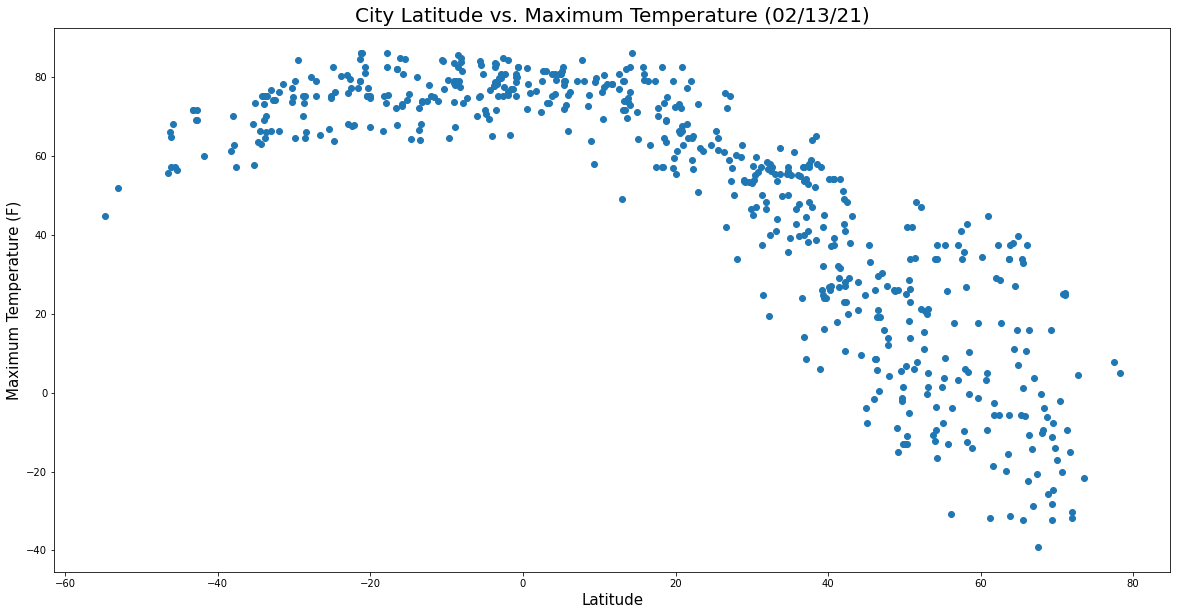

In [10]:
#Assign data to new variables
latitude = city_weather_df["Latitude"]
temperature = city_weather_df["Max Temperature"]

#Plot scatter plot with x and y values
plt.figure(figsize = (20,10))
plt.scatter(latitude, temperature)

#create x- and y-axis labels and a chart title
plt.title(f"City Latitude vs. Maximum Temperature (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Maximum Temperature (F)", fontsize = 15)

plt.savefig("../Images/Latitude_vs_Max_Temp_Plot.png")
plt.show()

This code is visualizing the maximum temperatures (F) of the 600+ cities found in comparison to their latitude coordinates. This scatter plot is showing that as the latitude moves further away from 0 (the equator), the maximum temperature declines for both positive and negative latitudes.

## Latitude vs. Humidity Plot

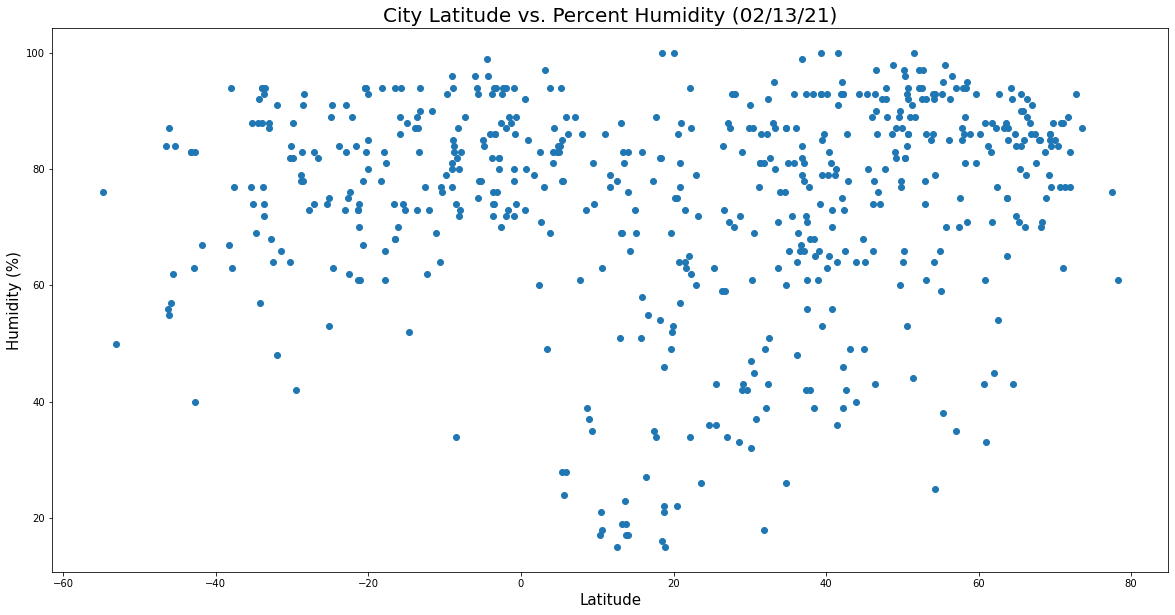

In [11]:
#Assign new variables
latitude = city_weather_df["Latitude"]
humidity = city_weather_df["Humidity"]

#Plot figure
plt.figure(figsize = (20, 10))
plt.scatter(latitude, humidity)

#chart labels and save plot image
plt.title(f"City Latitude vs. Percent Humidity (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize = 15)

plt.savefig("../Images/Latitude_vs_Humidity_Plot.png")
plt.show()

This code is visualizing the percent humidity measurements of the 600+ random cities in comparison to their latitude coordinates. This scatter plot is indicating that humidity may not be dependent on latitude, as there are high and low humidity percentages for both city coordinates closer the the equator and those that are located further away. 

## Latitude vs. Cloudiness Plot

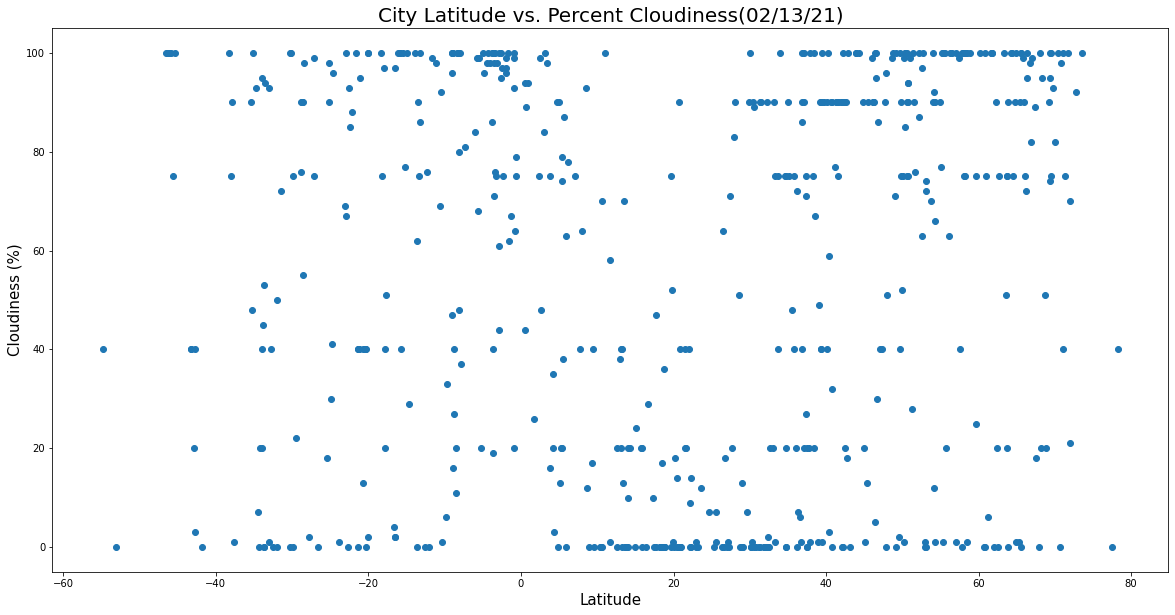

In [12]:
#define variables
latitude = city_weather_df["Latitude"]
cloudiness = city_weather_df["Cloudiness"]

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(latitude, cloudiness)

#designate labels and save as png file
plt.title(f"City Latitude vs. Percent Cloudiness(%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 15)

plt.savefig("../Images/Latitude_vs_Cloudiness_Plot.png")
plt.show()

This code is visualizing the percent cloudiness of 600+ randomly selected cities around the world in relation to their latitude coordinates. This scatter plot is indicating that there may not be a strong assocation between percent cloud cover and latitude coordinates, as the points are widely distributed across the graph with high and low percentages at coordinates closer and further away from the equator.

## Latitude vs. Wind Speed Plot

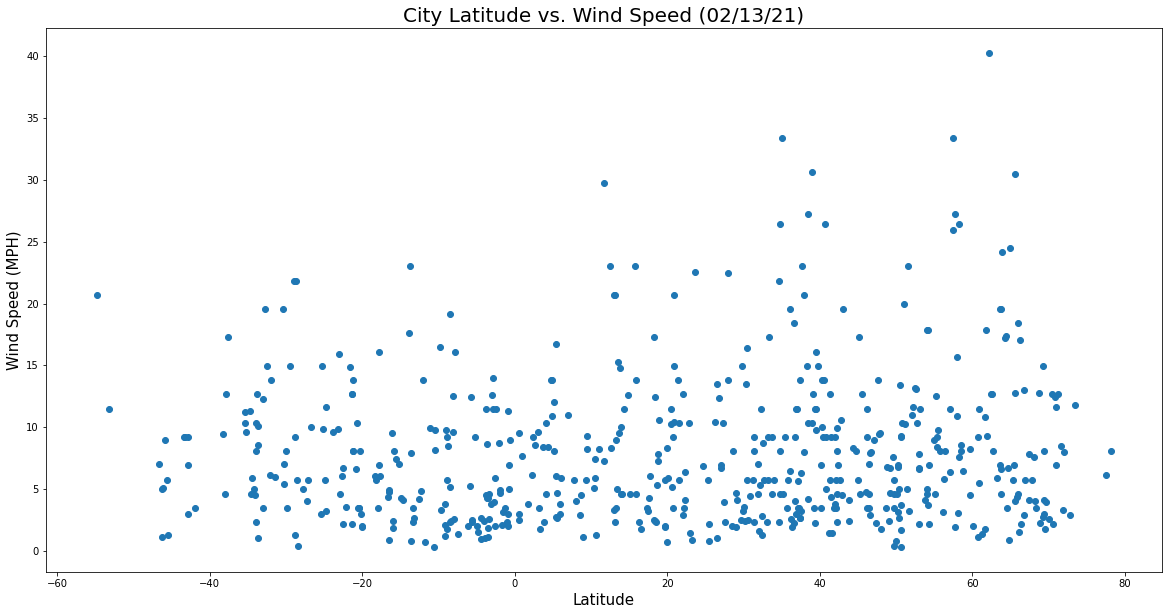

In [13]:
#define variables
latitude = city_weather_df["Latitude"]
wind_speed = city_weather_df["Wind Speed"]

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(latitude, wind_speed)

#assign labels and save to png file
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Wind Speed (MPH)", fontsize = 15)

plt.savefig("../Images/Latitude_vs_Wind_Speed.png")
plt.show()

This code is visualizing the relationship between the latitude coordinates of 600+ randomly selected cities around the globe and their calculated wind speeds, measured in mph. This scatter plot is indicating that generally speaking there are few outliers of high wind speeds across all latitude coordinates, meaning that wind speed may be attributed to different factors beyond latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r=value: -0.8674763362385154


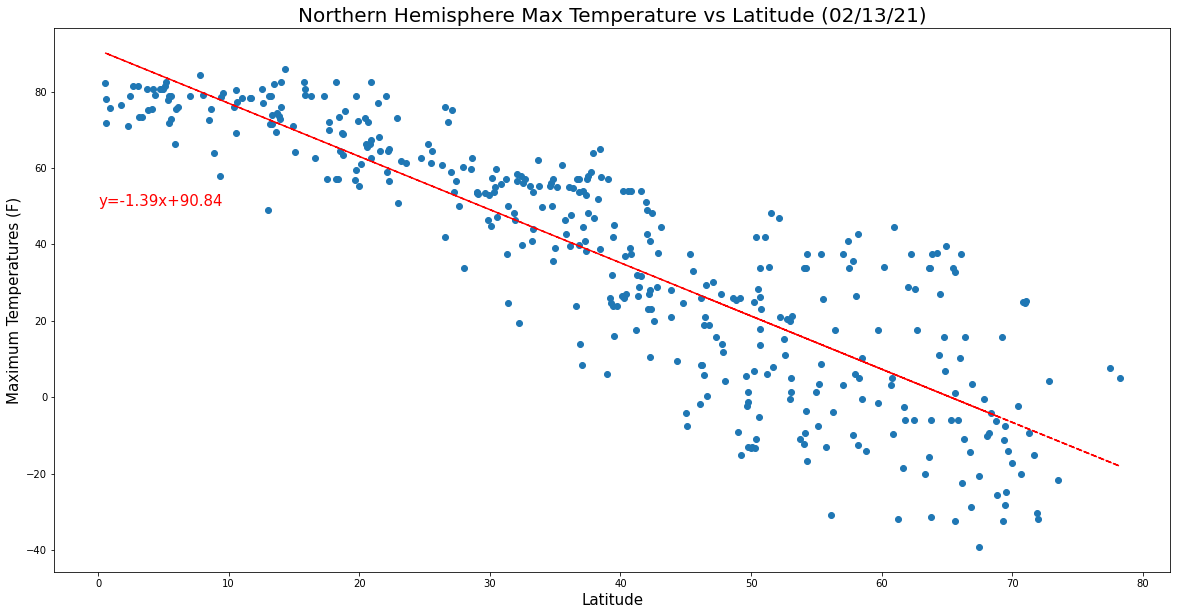

In [14]:
#Use .loc() function to filter for city latitudes above the equator
n_lats = city_weather_df.loc[(city_weather_df["Latitude"] > 0)]

#define variables
north_latitude = n_lats["Latitude"]
north_max_temp = n_lats["Max Temperature"]

#designate linear regression between latitude and max temp
temp_lat_slope, temp_lat_int, temp_lat_r, temp_lat_p, temp_lat_std_err = st.linregress(north_latitude, north_max_temp)

#create slope intercept equation
temp_lat_best_fit = temp_lat_slope * north_latitude + temp_lat_int

#convert to y=mx+b format for graph
north_temp_equation = "y=" + str(round(temp_lat_slope, 2)) + "x+" + str(round(temp_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(north_latitude, north_max_temp)

#Plot linear regression
plt.plot(north_latitude, temp_lat_best_fit, "--", color = "red")

#plot y=mx+b equation on chart
plt.annotate(north_temp_equation, (0, 50), fontsize = 15, color="red")

#assign labels and save to png file
plt.title(f"Northern Hemisphere Max Temperature vs Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Maximum Temperatures (F)", fontsize = 15)

#include r-value in output
print(f"r=value: {temp_lat_r}")

plt.savefig("../Images/North_Hem_Max_Temp_vs_Lat_Plot.png")
plt.show()


This code is visualizing the relationship between maximum temperature of 600+ random cities around the globe and their associated latitude coordinates in the northern hemisphere. This scatter plot indicates that as cities are located further away from the equator, their maximum temperature decreases which is expected.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.585121883968786


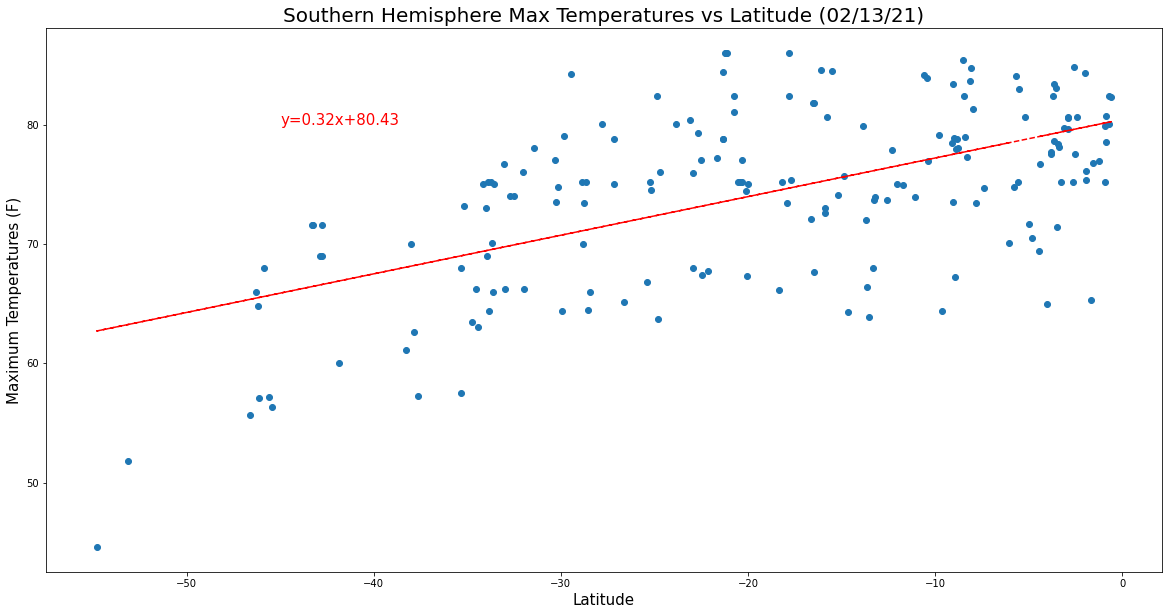

In [15]:
#.loc() for cities below equator and define variables
s_lats = city_weather_df.loc[city_weather_df["Latitude"] <0]

south_latitude = s_lats["Latitude"]
south_max_temp = s_lats["Max Temperature"]

#linear regression/slope-intercept 
s_lat_slope, s_lat_int, s_lat_r, s_lat_p, s_lat_std_err = st.linregress(south_latitude, south_max_temp)

s_lat_fit = s_lat_slope * south_latitude + s_lat_int

#y=mx+b equation
s_lat_equation = "y=" + str(round(s_lat_slope, 2)) + "x+" + str(round(s_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(south_latitude, south_max_temp)

#Plot linear regression
plt.plot(south_latitude, s_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(s_lat_equation, (-45,80), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Max Temperatures vs Latitude (%s)" % time.strftime("%x"), fontsize = 20, )
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Maximum Temperatures (F)", fontsize = 15)

#designate r-value
print(f"r-value: {s_lat_r}")
      
plt.savefig("../Images/South_Hem_Max_Temp_vs_Lat_Plot.png")
plt.show()

This code is visualizing the relationship between maximum temperature of 600+ random cities around the globe and their associated latitude coordinates in the southern hemisphere. This scatter plot indicates that as cities move closer to the equator, there is a positive relationship between temperature and latitude, i.e. they experience higher temperatures which is expected.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.31613655196770113


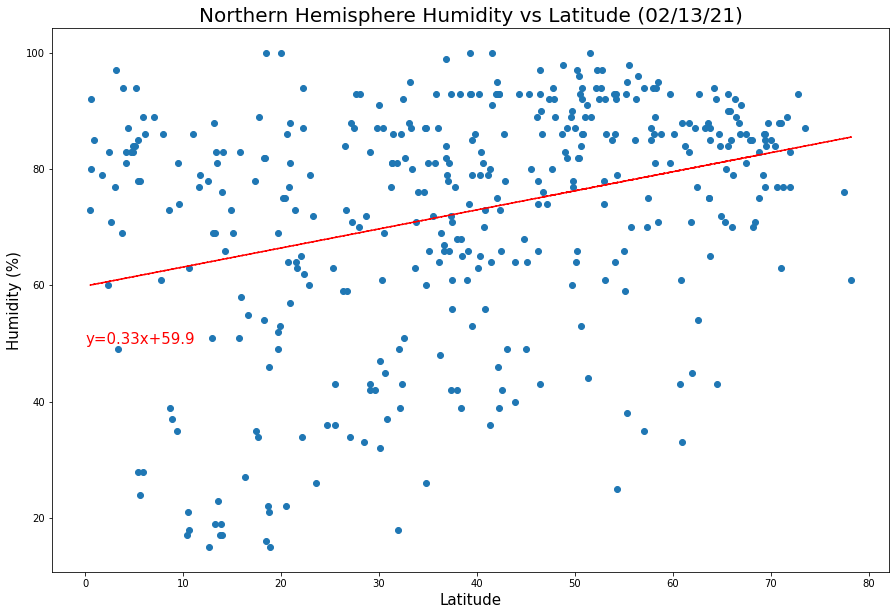

In [16]:
#Define variables
north_latitude = n_lats["Latitude"]
north_humidity = n_lats["Humidity"]

#linear regression/slope intercept
n_lat_slope, n_lat_int, n_lat_r, n_lat_p, n_lat_std_err = st.linregress(north_latitude, north_humidity)

n_lat_fit = n_lat_slope * north_latitude + n_lat_int

#y=mx+b equation
n_lat_equation = "y=" + str(round(n_lat_slope, 2)) + "x+" + str(round(n_lat_int, 2))

#plot figure
plt.figure(figsize = (15,10))
plt.scatter(north_latitude, north_humidity)

#Plot linear regression
plt.plot(north_latitude, n_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(n_lat_equation, (0,50), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Northern Hemisphere Humidity vs Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 15)

#designate r-value
print(f"r-value: {n_lat_r}")
      
plt.savefig("../Images/North_Hem_Humidity_vs_Lat_Plot.png")
plt.show()


This code is visualizing the relationship between percent humidity of 600+ random cities around the globe and their associated latitude coordinates in the northern hemisphere. This scatter plot indicates that there is a minimal positive relationship between humidity levels and latitude coordinates, as some locations closer to the equator have lower humidity percentage and some locations further from the equator experience higher humidity percentages. Given that there is a wide array of city points beyond the best fit line of this linear regression, there may not be any definitive conclusions to be made on the association of latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.27867492837073676


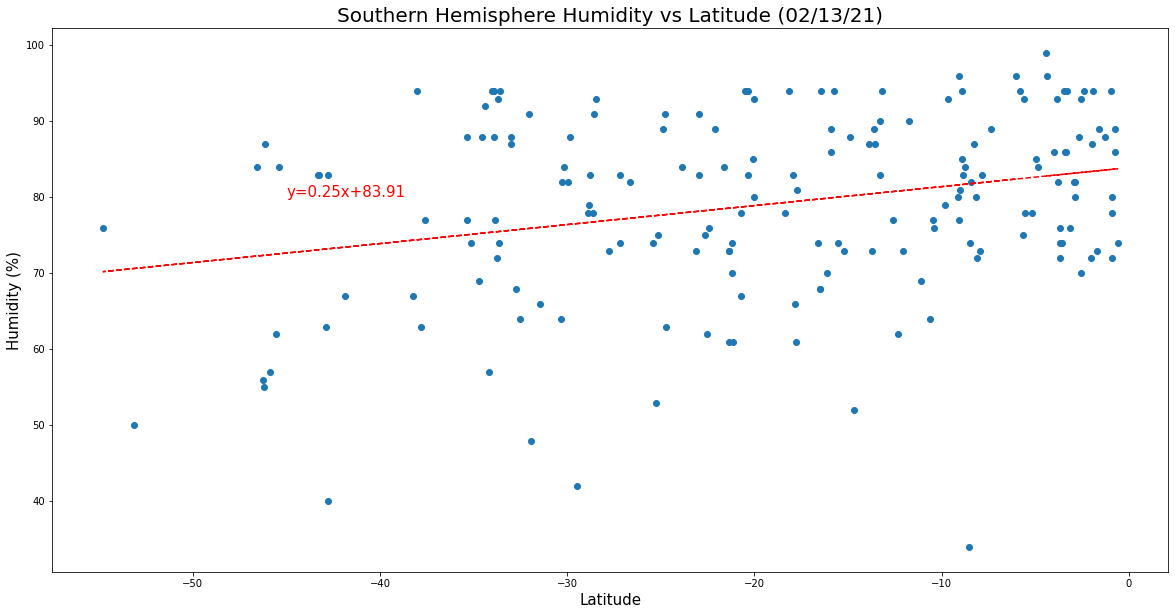

In [17]:
#Define variables
south_latitude = s_lats["Latitude"]
south_humidity = s_lats["Humidity"]

#linear regression/slope-intercept 
s_lat_slope, s_lat_int, s_lat_r, s_lat_p, s_lat_std_err = st.linregress(south_latitude, south_humidity)

s_lat_fit = s_lat_slope * south_latitude + s_lat_int

#y=mx+b equation
s_lat_equation = "y=" + str(round(s_lat_slope, 2)) + "x+" + str(round(s_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(south_latitude, south_humidity)

#Plot linear regression
plt.plot(south_latitude, s_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(s_lat_equation, (-45,80), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Humidity vs Latitude (%s)" % time.strftime("%x"), fontsize = 20, )
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Humidity (%)", fontsize = 15)

#designate r-value
print(f"r-value: {s_lat_r}")
      
plt.savefig("../Images/South_Hem_Humidity_vs_Lat_Plot.png")
plt.show()


This code is visualizing the relationship between percent humidity of 600+ random cities around the globe and their associated latitude coordinates in the southern hemisphere. This scatter plot indicates that there is a minimal positive relationship between humidity levels and latitude coordinates, as some locations closer to the equator have lower humidity percentage and some locations further from the equator experience higher humidity percentages. Given that there is a wide array of city points beyond the best fit line of this linear regression, there may not be any definitive conclusions to be made on the association of latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.3572898528959919


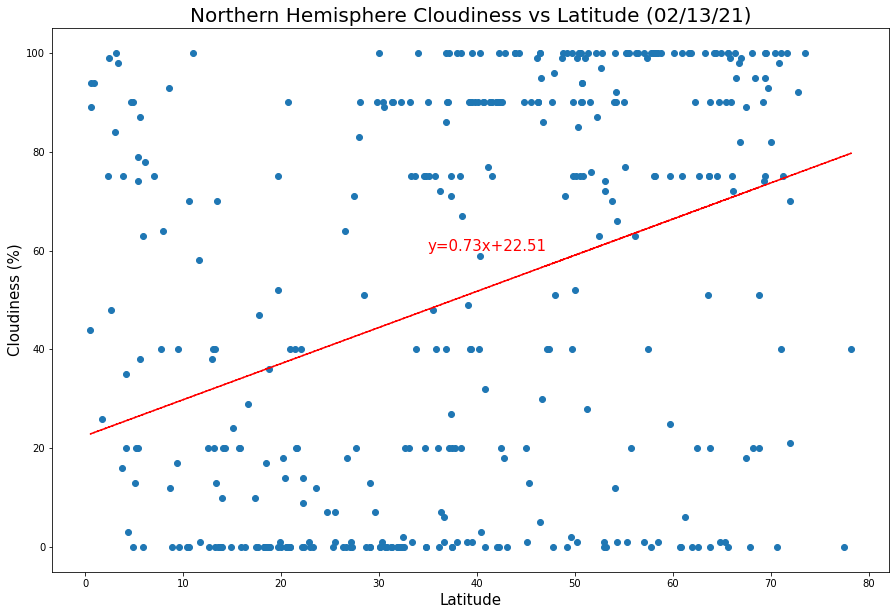

In [18]:
#Define variables
north_latitude = n_lats["Latitude"]
north_cloudiness = n_lats["Cloudiness"]

#linear regression/slope intercept
n_lat_slope, n_lat_int, n_lat_r, n_lat_p, n_lat_std_err = st.linregress(north_latitude, north_cloudiness)

n_lat_fit = n_lat_slope * north_latitude + n_lat_int

#y=mx+b equation
n_lat_equation = "y=" + str(round(n_lat_slope, 2)) + "x+" + str(round(n_lat_int, 2))

#plot figure
plt.figure(figsize = (15,10))
plt.scatter(north_latitude, north_cloudiness)

#Plot linear regression
plt.plot(north_latitude, n_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(n_lat_equation, (35,60), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Northern Hemisphere Cloudiness vs Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 15)

#designate r-value
print(f"r-value: {n_lat_r}")
      
plt.savefig("../Images/North_Hem_Cloud_vs_Lat_Plot.png")
plt.show()


This code is visualizing the relationship between percent cloudiness of 600+ random cities around the globe and their associated latitude coordinates in the northern hemisphere. This scatter plot indicates that there is a minimal positive relationship between humidity levels and latitude coordinates, as some locations closer to the equator have lower cloudiness percentage and some locations further from the equator experience higher cloudiness percentages. Given that there is a wide array of city points beyond the best fit line of this linear regression, there may not be any definitive conclusions to be made on the association of latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.23395531128771307


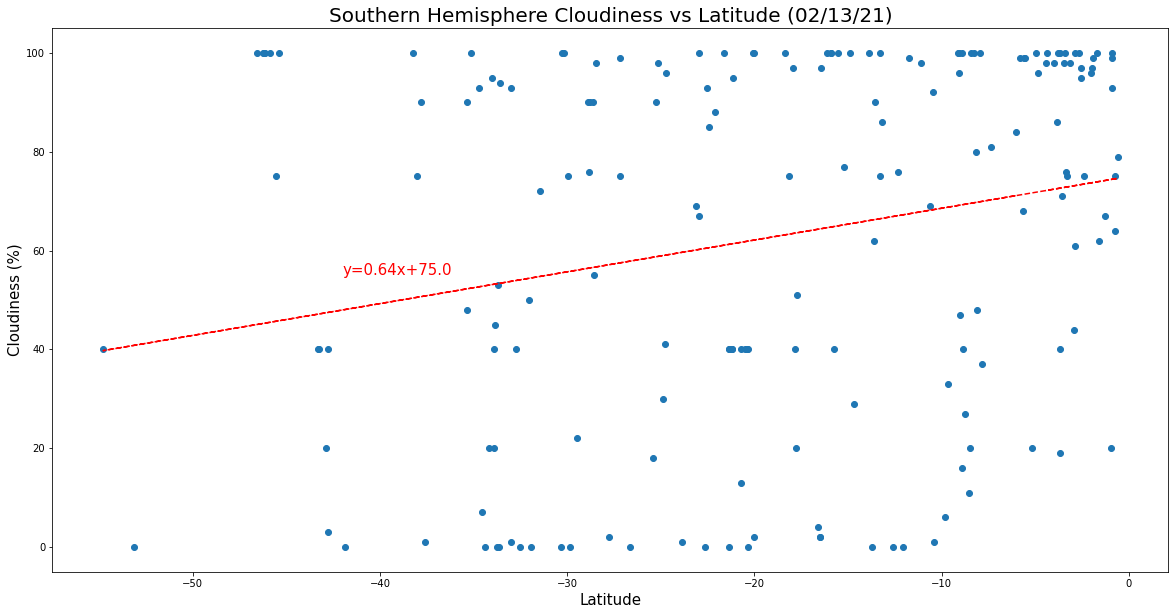

In [19]:
#Define variables
south_latitude = s_lats["Latitude"]
south_cloudiness = s_lats["Cloudiness"]

#linear regression/slope-intercept 
s_lat_slope, s_lat_int, s_lat_r, s_lat_p, s_lat_std_err = st.linregress(south_latitude, south_cloudiness)

s_lat_fit = s_lat_slope * south_latitude + s_lat_int

#y=mx+b equation
s_lat_equation = "y=" + str(round(s_lat_slope, 2)) + "x+" + str(round(s_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(south_latitude, south_cloudiness)

#Plot linear regression
plt.plot(south_latitude, s_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(s_lat_equation, (-42,55), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Cloudiness vs Latitude (%s)" % time.strftime("%x"), fontsize = 20, )
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Cloudiness (%)", fontsize = 15)

#designate r-value
print(f"r-value: {s_lat_r}")
      
plt.savefig("../Images/South_Hem_Cloud_vs_Lat_Plot.png")
plt.show()

This code is visualizing the relationship between percent cloudiness of 600+ random cities around the globe and their associated latitude coordinates in the southern hemisphere. This scatter plot indicates that there is a minimal positive relationship between humidity levels and latitude coordinates, as some locations closer to the equator have lower cloudiness percentage and some locations further from the equator experience higher cloudiness percentages. Given that there is a wide array of city points beyond the best fit line of this linear regression, there may not be any definitive conclusions to be made on the association of latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.07161950933196576


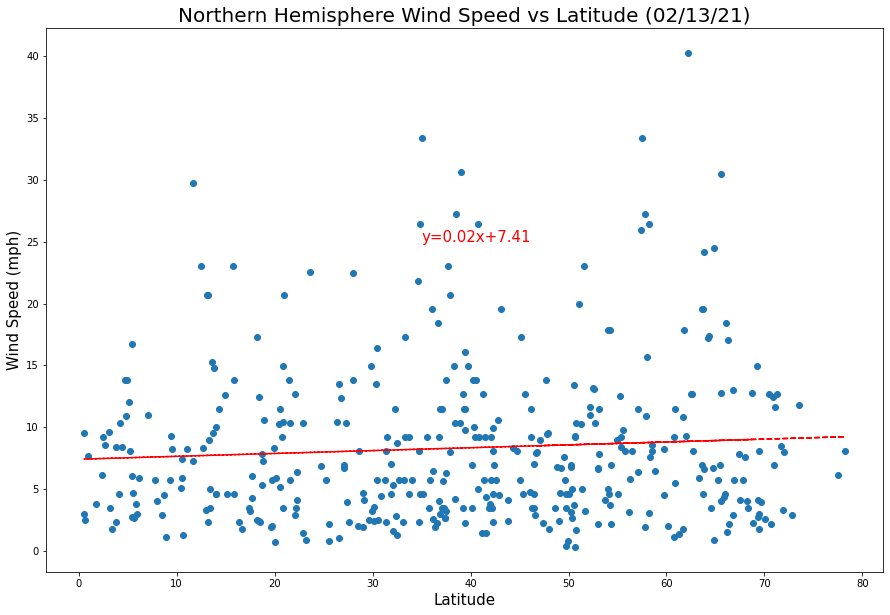

In [20]:
#Define variables
north_latitude = n_lats["Latitude"]
north_wind_speed = n_lats["Wind Speed"]

#linear regression/slope intercept
n_lat_slope, n_lat_int, n_lat_r, n_lat_p, n_lat_std_err = st.linregress(north_latitude, north_wind_speed)

n_lat_fit = n_lat_slope * north_latitude + n_lat_int

#y=mx+b equation
n_lat_equation = "y=" + str(round(n_lat_slope, 2)) + "x+" + str(round(n_lat_int, 2))

#plot figure
plt.figure(figsize = (15,10))
plt.scatter(north_latitude, north_wind_speed)

#Plot linear regression
plt.plot(north_latitude, n_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(n_lat_equation, (35,25), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Northern Hemisphere Wind Speed vs Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Wind Speed (mph)", fontsize = 15)

#designate r-value
print(f"r-value: {n_lat_r}")
      
plt.savefig("../Images/North_Hem_Wind_vs_Lat_Plot.png")
plt.show()


This code is visualizing the relationship between wind speed (mph) of 600+ random cities around the globe and their associated latitude coordinates in the northern hemisphere. This scatter plot indicates that there is a minimal positive relationship between humidity levels and latitude coordinates, as some locations closer to the equator have lower wind speeds and some locations further from the equator experience higher wind speeds. Given that the slope of the best fit line is as low as 0.04, it is indicative of a weaker association between latitude coordinates and average wind speeds.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: -0.2235853686904679


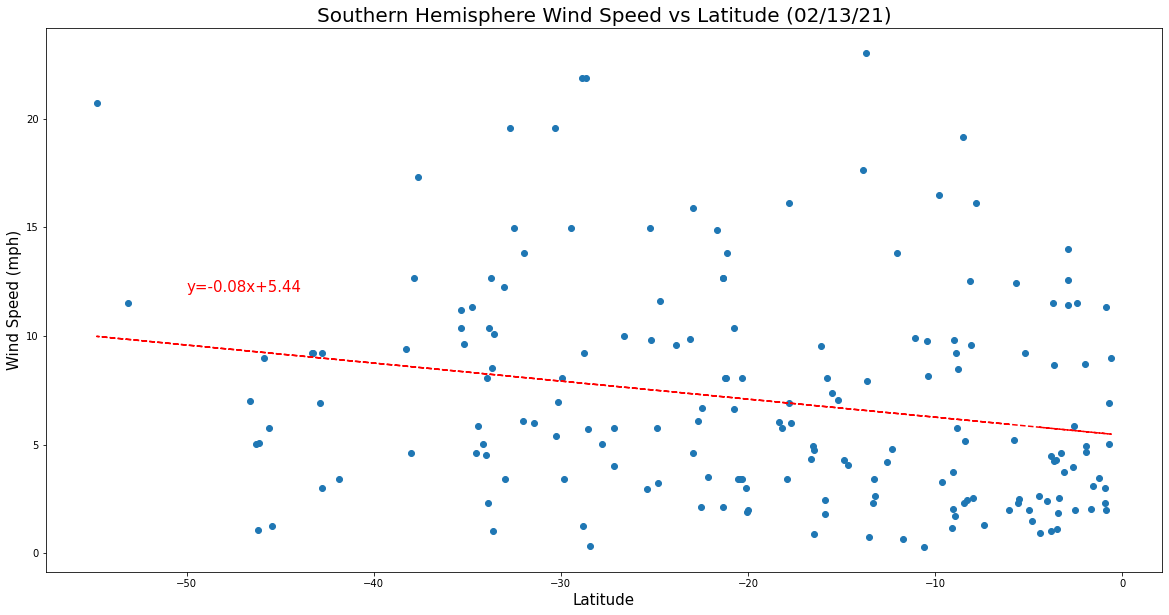

In [21]:
#Define variables
south_latitude = s_lats["Latitude"]
south_wind_speed = s_lats["Wind Speed"]

#linear regression/slope-intercept 
s_lat_slope, s_lat_int, s_lat_r, s_lat_p, s_lat_std_err = st.linregress(south_latitude, south_wind_speed)

s_lat_fit = s_lat_slope * south_latitude + s_lat_int

#y=mx+b equation
s_lat_equation = "y=" + str(round(s_lat_slope, 2)) + "x+" + str(round(s_lat_int, 2))

#plot figure
plt.figure(figsize = (20,10))
plt.scatter(south_latitude, south_wind_speed)

#Plot linear regression
plt.plot(south_latitude, s_lat_fit, "--", color="red")

#Add y=mx+b to chart
plt.annotate(s_lat_equation, (-50,12), color="red", fontsize = 15)

#Assign labels and save as png file
plt.title(f"Southern Hemisphere Wind Speed vs Latitude (%s)" % time.strftime("%x"), fontsize = 20, )
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Wind Speed (mph)", fontsize = 15)

#designate r-value
print(f"r-value: {s_lat_r}")
      
plt.savefig("../Images/South_Wind_vs_Lat_Plot.png")
plt.show()

This code is visualizing the relationship between wind speeds of 600+ random cities around the globe and their associated latitude coordinates in the northern hemisphere. This scatter plot indicates that there is a minimal negative relationship between average wind speeds and latitude coordinates, as some locations closer to the equator have lower wind speeds and some locations further from the equator experience higher wind speeds. Given that there is a wide array of city points beyond the best fit line of this linear regression, and that the slope is as minimal as 0.06, there may not be any definitive conclusions to be made on the association of latitude and average wind speeds.